In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt

from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import warnings

In [97]:
data = 'C:/Python/Logistic_Regression/datatab.xlsx'

# read by default 1st sheet of an excel file
df = pd.read_excel(data)

print(df)

   Purchasing behaviour  Gender  Age  Time spent in online shop
0               Buy now  female   22                         40
1               Buy now  female   25                         23
2               Buy now    male   18                         12
3               Buy now    male   45                         28
4               Buy now  female   12                         43
5               Buy now    male   43                         23
6               Buy now    male   23                         55
7               Buy now    male   33                         34
8             Buy later  female   27                         28
9             Buy later  female   27                         15
10            Buy later    male   48                        110
11            Buy later    male   34                         28
12            Buy later    male   32                         11
13            Buy later    male   66                         32
14            Buy later    male   24    

In [98]:
#df["Purchasing behaviour"] = np.where(df["Purchasing behaviour"] == "Buy now" or df["Purchasing behaviour"] == "Buy later", 1,0)
df.loc[df["Purchasing behaviour"] == "Buy now", "Purchasing behaviour"] = 1
df.loc[df["Purchasing behaviour"] == "Buy later", "Purchasing behaviour"] = 1
df.loc[df["Purchasing behaviour"] == "Don't buy anything", "Purchasing behaviour"] = 0

In [99]:
df.head(10)

,Purchasing behaviour,Gender,Age,Time spent in online shop
0,1,female,22,40
1,1,female,25,23
2,1,male,18,12
3,1,male,45,28
4,1,female,12,43
5,1,male,43,23
6,1,male,23,55
7,1,male,33,34
8,1,female,27,28
9,1,female,27,15


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Purchasing behaviour       24 non-null     object
 1   Gender                     24 non-null     object
 2   Age                        24 non-null     int64 
 3   Time spent in online shop  24 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 900.0+ bytes


In [101]:
df['Purchasing behaviour'] = df['Purchasing behaviour'].astype(int)

In [102]:
X = df.drop('Purchasing behaviour', axis=1)
y = df['Purchasing behaviour']

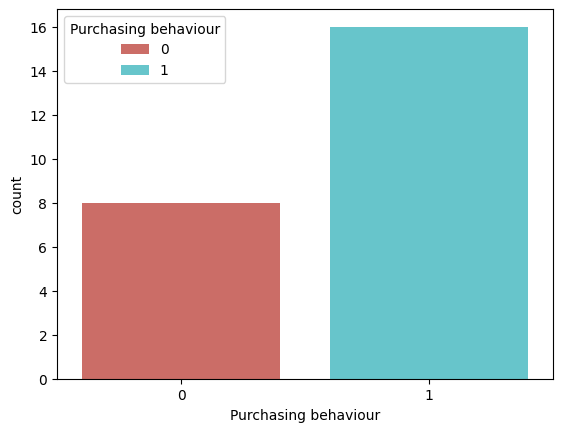

In [103]:
sns.countplot(x='Purchasing behaviour', hue=y, data = df, palette = 'hls')
plt.show()

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# Preprocess the data
category_names = X_train.select_dtypes(include=['object']).columns 
numeric_names = X_train.select_dtypes('number').columns


In [106]:
ohe = OneHotEncoder(cols=category_names, use_cat_names=True)
X_train = ohe.fit_transform(X_train).astype(float)
X_test = ohe.transform(X_test).astype(float)

scaler = StandardScaler()
X_train.loc[:, numeric_names] = scaler.fit_transform(X_train.loc[:, numeric_names])
X_test.loc[:, numeric_names] = scaler.transform(X_test.loc[:, numeric_names])

In [107]:
X_train.head()

,Gender_female,Gender_male,Age,Time spent in online shop
9,1.0,0.0,-0.655762,-1.094453
13,0.0,1.0,1.513522,-0.417234
1,1.0,0.0,-0.767007,-0.775761
21,1.0,0.0,2.737220,0.060803
5,0.0,1.0,0.234201,-0.775761


In [108]:
# Instantiate the logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [109]:
# Predict the outcomes for the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6
